## Double Pendulum ##

### Equal lengths and masses ###

Hamiltonian:
$$
H=\frac{1}{2ml^2}\frac{p_1^2+p_2^2-2p_1p_2\cos(\varphi_1-\varphi_2)}{1+\sin^2(\varphi_1-\varphi_2)}-mgl(2\cos\varphi_1+\cos\varphi_2)
$$

In [1]:
import sys
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from math import sin, cos

#The following line makes modules in src/ accessible from the (current) test/ dir
sys.path.append("../src")
import nevh

In [2]:
# Hamiltonian function for the NEVH approach
def H(t, s, m, g, l):
    q1, q2, p1, p2 = s
    H1 = (1.0/(2*m*l**2)) * (p1**2 + p2**2 - 2*p1*p2*cos(q1-q2)) / (1 + (sin(q1-q2))**2)
    H2 = -m*g*l * (2*cos(q1) + cos(q2))
    return H1 + H2

# RHS of Hamilton's equations, for the standard approach
def rhs(t, s, m, g, l):
    q1, q2, p1, p2 = s
    sindq = sin(q1-q2)
    cosdq = cos(q1-q2)
    den = 1+ sindq**2
    dHddq = (1/(2*m*l**2)) * ( 2*p1*p2*sindq / den - 
        (p1**2 + p2**2 - 2*p1*p2*cosdq) / (1+sindq**2)**2 * 2*sindq*cosdq )
    dHdq1 =  dHddq + 2*m*g*l * sin(q1)
    dHdq2 = -dHddq +   m*g*l * sin(q2)
    dHdp1 = (1/(m*l**2)) * (p1 - p2*cosdq) / den
    dHdp2 = (1/(m*l**2)) * (p2 - p1*cosdq) / den
    return [dHdp1, dHdp2, -dHdq1, -dHdq2]

In [4]:
# Physical and numeric parameters, inits
m=1.0; l=1.0; g = 9.8
ds = np.ones(4) * 0.02

G = nevh.HGrad(H, ds, m=m, l=l, g=g)

q1 = np.pi / 2
q2 = 0
p1 = p2 = 0.0
s0 = np.array([q1, q2, p1, p2])
ti = 0.0; tf = 20.0; time_interval = [ti, tf]
N=500
t = np.linspace(ti, tf, N)
dt = (tf-ti)/N


In [5]:
#NEVH
%time trjn = solve_ivp(G, time_interval, s0, max_step=dt, t_eval=t)
tn = trjn.t
q1n, q2n, p1n, p2n = trjn.y[:4]

#Standard
%time trjs = solve_ivp(rhs, time_interval, s0, max_step=dt, t_eval=t, args = [m, g, l])
ts = trjs.t
q1s, q2s, p1s, p2s = trjs.y[:4]

CPU times: user 458 ms, sys: 165 µs, total: 458 ms
Wall time: 477 ms
CPU times: user 124 ms, sys: 12 µs, total: 124 ms
Wall time: 124 ms


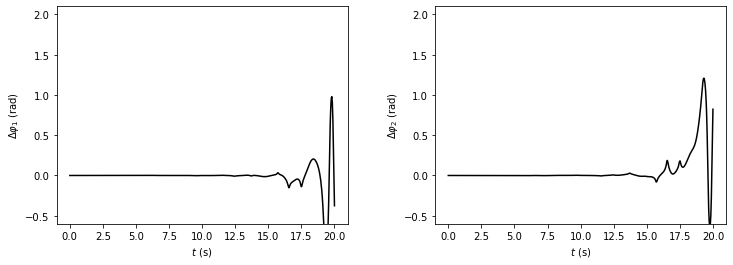

In [8]:
fig, (axq1,axq2) = plt.subplots(1,2, figsize=(12,4))
axq1.set_ylim(-0.6,2.1)
axq2.set_ylim(-0.6,2.1)
axq1.set_ylabel(r"$\Delta \varphi_1$ (rad)")
axq2.set_ylabel(r"$\Delta \varphi_2$ (rad)")
axq1.set_xlabel(r"$t$ (s)")
axq2.set_xlabel(r"$t$ (s)")
plt.subplots_adjust(wspace=0.3)
axq1. plot(tn,q1n-q1s,'k');
axq2. plot(tn,q2n-q2s,'k');

In [9]:
fig.savefig("dpchaos.png", bbox_inches='tight',dpi=300)